In [136]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as XGB

import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv('../dataset/healthcare-dataset-stroke-data.csv').drop('id', axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [68]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [69]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [70]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [72]:
categorical_cols = [i for i in data.columns if data[i].dtypes == 'object' or data[i].nunique() == 2]
categorical_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

In [73]:
for i in categorical_cols:
    print(f'{i} : {data[i].unique()}')

gender : ['Male' 'Female' 'Other']
hypertension : [0 1]
heart_disease : [1 0]
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke : [1 0]


In [74]:
data.drop_duplicates(inplace=True)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [76]:
data_pre = data.copy()
LE = LabelEncoder()

In [77]:
for i in data_pre.columns:
    if i in categorical_cols:
        data_pre[i] = LE.fit_transform(data_pre[i])
    else:
        data_pre[i] = normalize(data_pre[i].to_numpy().reshape(-1,1), axis=0)
data_pre.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.019213,0,1,1,2,1,0.027722,0.01714,1,1
1,0,0.017492,0,0,1,3,0,0.024512,0.01316,2,1
2,1,0.022941,0,1,1,2,0,0.012840,0.01522,2,1
3,0,0.014051,0,0,1,2,1,0.020757,0.01611,3,1
4,0,0.022654,1,0,1,3,0,0.021107,0.01124,2,1


In [85]:
data['stroke'].value_counts().to_frame() #Imbalance dataset

,stroke
0,4861
1,249


In [86]:
249/(4861+249) * 100 

4.87279843444227

In [88]:
minority_class = data_pre[data_pre['stroke'] == 1]
majority_class = data_pre[data_pre['stroke'] == 0]

# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the upsampled minority class with the majority class
data_pre = pd.concat([majority_class, minority_upsampled])

In [89]:
data_pre['stroke'].value_counts().to_frame()

,stroke
0,4861
1,4861


Text(0.5, 1.0, 'Correlation Heatmap')

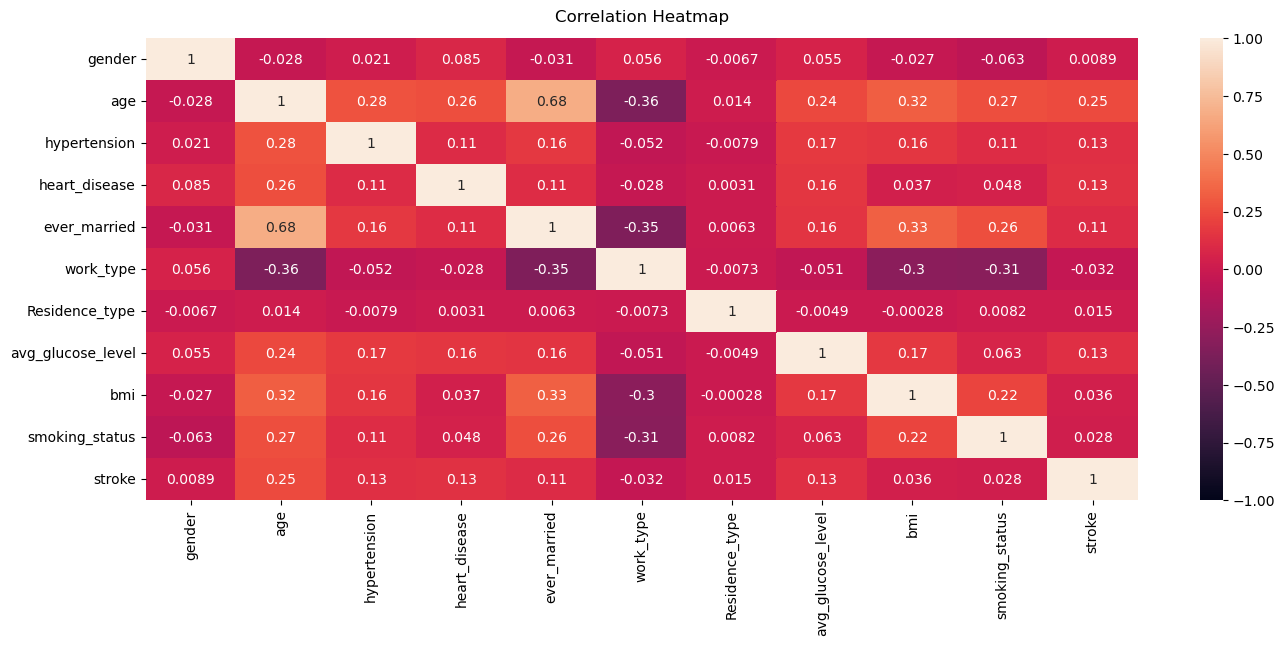

In [83]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_pre.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Among the metrics gender, age, hypertension, heart disease, ever married, residence type, avg glucose level, bmi, and smoking status have respectably high effect on stroke. The least effect factor is work type.

In [150]:
X = data_pre.drop(['work_type', 'stroke'], axis=1)
y = data_pre['stroke']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [152]:
model1 = LogisticRegression().fit(X_train, y_train)
confusion_matrix(y_test, model1.predict(X_test))

array([[644, 329],
       [311, 661]], dtype=int64)

In [153]:
model1.score(X_test, y_test)

0.6709511568123393

In [154]:
model2 = SGDClassifier().fit(X_train, y_train)
confusion_matrix(y_test, model2.predict(X_test))

array([[349, 624],
       [ 60, 912]], dtype=int64)

In [155]:
model2.score(X_test, y_test)

0.6483290488431876

In [156]:
model3 = DecisionTreeClassifier().fit(X_train, y_train)
confusion_matrix(y_test, model3.predict(X_test))

array([[936,  37],
       [  0, 972]], dtype=int64)

In [157]:
model3.score(X_test, y_test)

0.9809768637532134

In [158]:
model4 = AdaBoostClassifier().fit(X_train, y_train)
confusion_matrix(y_test, model4.predict(X_test))

array([[719, 254],
       [ 96, 876]], dtype=int64)

In [159]:
model4.score(X_test, y_test)

0.8200514138817481

In [160]:
model5 = GaussianNB().fit(X_train, y_train)
confusion_matrix(y_test, model5.predict(X_test))

array([[725, 248],
       [194, 778]], dtype=int64)

In [161]:
model5.score(X_test, y_test)

0.7727506426735219

In [162]:
model6 = MLPClassifier().fit(X_train, y_train)
confusion_matrix(y_test, model6.predict(X_test))

c:\Users\tegar\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[734, 239],
       [139, 833]], dtype=int64)

In [163]:
model6.score(X_test, y_test)

0.8056555269922879

In [164]:
model7 = KNeighborsClassifier().fit(X_train, y_train)
confusion_matrix(y_test, model7.predict(X_test))

array([[849, 124],
       [  0, 972]], dtype=int64)

In [165]:
model7.score(X_test, y_test)

0.9362467866323907

In [166]:
model8 = GradientBoostingClassifier().fit(X_train, y_train)
confusion_matrix(y_test, model8.predict(X_test))

array([[767, 206],
       [ 78, 894]], dtype=int64)

In [167]:
model8.score(X_test, y_test)

0.8539845758354756

In [168]:
model9 = XGB.XGBClassifier().fit(X_train, y_train)
confusion_matrix(y_test, model9.predict(X_test))

array([[933,  40],
       [  0, 972]], dtype=int64)

In [169]:
model9.score(X_test, y_test)

0.9794344473007712

Top 3 models: Decision Tree, XGBoost, KNeighbors

In [170]:
w = [2, 1, 1]
model10 = VotingClassifier(estimators=[('clf1', model3), ('clf2', model9), ('clf3',  model7)], voting='hard', weights=w).fit(X_train, y_train)
confusion_matrix(y_test, model10.predict(X_test))

array([[946,  27],
       [  0, 972]], dtype=int64)

In [171]:
model10.score(X_test, y_test)

0.9861182519280206

In [172]:
# model dict
models = {'LR': model1, 
          'SGD': model2, 
          'DTC': model3, 
          'AdaBoost': model4,
          'Gaussian': model5,
          'MLP': model6,
          'KNB': model7,
          'GBC': model8,
          'XGB': model9,
          'WV': model10}

In [173]:
model_name = []
acc = []
auc = []
FP_rate = []
FN_rate = []

for i in models.keys():
    model_name.append(i)
    y_pred = models[i].predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    auc.append(roc_auc_score(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    FP_rate.append(fp / (fp + tp) * 100)
    FN_rate.append(fn / (fn + tn) * 100)

report_df = pd.DataFrame({'model_name': model_name, 'accuracy': acc, 'roc_auc_score': auc, 'FP_rate': FP_rate, 'FN_rate': FN_rate})

In [174]:
report_df

,model_name,accuracy,roc_auc_score,FP_rate,FN_rate
0,LR,0.670951,0.670956,33.232323,32.565445
1,SGD,0.648329,0.648478,40.625000,14.669927
2,DTC,0.980977,0.980987,3.666997,0.000000
3,AdaBoost,0.820051,0.820093,22.477876,11.779141
4,Gaussian,0.772751,0.772765,24.171540,21.109902
5,MLP,0.805656,0.805682,22.294776,15.922108
6,KNB,0.936247,0.936280,11.313869,0.000000
7,GBC,0.853985,0.854018,18.727273,9.230769
8,XGB,0.979434,0.979445,3.952569,0.000000
9,WV,0.986118,0.986125,2.702703,0.000000
